# SHAP Explanation Project
This mini-project demonstrates how to interpret a machine learning model using SHAP (SHapley Additive exPlanations). I used a Random Forest classifier to predict breast cancer diagnosis (malignant or benign), and explain individual predictions using SHAP values.

## Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap


## Load and Prepare the Dataset

In [3]:
columns = [
    "ID", "Diagnosis",
    "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean",
    "concavity_mean", "concave_points_mean", "symmetry_mean", "fractal_dimension_mean",
    "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se",
    "concavity_se", "concave_points_se", "symmetry_se", "fractal_dimension_se",
    "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst",
    "concavity_worst", "concave_points_worst", "symmetry_worst", "fractal_dimension_worst"
]

df = pd.read_csv("wdbc.data", header=None, names=columns)

df.drop("ID", axis=1, inplace=True)

df["Diagnosis"] = df["Diagnosis"].map({"M": 1, "B": 0})


In [4]:
df.head()

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Feature & Target Split
I separated the features (`X`) and the target label (`y`), then split the data into training and testing sets.

In [5]:
from sklearn.model_selection import train_test_split

X = df.drop("Diagnosis", axis=1)
y = df["Diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Train the Random Forest Model
I trained a RandomForestClassifier, a tree-based ensemble model, on our dataset.

In [6]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## Step 5: Calculate SHAP Values
We use `shap.TreeExplainer` to compute SHAP values for the trained model. These values explain how each feature contributes to a specific prediction.

In [10]:
explainer = shap.Explainer(model=rf)
shap_values=explainer(X_test)

single_output_shap_values = shap_values[:, :, 1]

shap_df = pd.DataFrame(data=single_output_shap_values.values, columns=X_test.columns.tolist())

In [11]:
shap_values

.values =
array([[[ 1.84891585e-02, -1.84891585e-02],
        [ 3.23493078e-03, -3.23493078e-03],
        [ 1.39603573e-02, -1.39603573e-02],
        ...,
        [ 5.74084212e-02, -5.74084212e-02],
        [-2.34079232e-03,  2.34079232e-03],
        [ 1.40953675e-03, -1.40953675e-03]],

       [[-4.36306396e-02,  4.36306396e-02],
        [-7.39870260e-03,  7.39870260e-03],
        [-3.90209591e-02,  3.90209591e-02],
        ...,
        [-9.19780694e-02,  9.19780694e-02],
        [ 5.94342361e-03, -5.94342361e-03],
        [ 1.11906066e-03, -1.11906066e-03]],

       [[-2.76353367e-02,  2.76353367e-02],
        [-1.13121690e-03,  1.13121690e-03],
        [-2.78507506e-02,  2.78507506e-02],
        ...,
        [-7.51671405e-02,  7.51671405e-02],
        [-1.38930888e-04,  1.38930888e-04],
        [-2.70382944e-05,  2.70382944e-05]],

       ...,

       [[ 1.27373798e-02, -1.27373798e-02],
        [ 1.02243978e-02, -1.02243978e-02],
        [ 1.42393218e-02, -1.42393218e-02],
        

In [12]:
single_output_shap_values

.values =
array([[-1.84891585e-02, -3.23493078e-03, -1.39603573e-02, ...,
        -5.74084212e-02,  2.34079232e-03, -1.40953675e-03],
       [ 4.36306396e-02,  7.39870260e-03,  3.90209591e-02, ...,
         9.19780694e-02, -5.94342361e-03, -1.11906066e-03],
       [ 2.76353367e-02,  1.13121690e-03,  2.78507506e-02, ...,
         7.51671405e-02,  1.38930888e-04,  2.70382944e-05],
       ...,
       [-1.27373798e-02, -1.02243978e-02, -1.42393218e-02, ...,
        -4.84384279e-02, -4.39715969e-03, -2.40741766e-04],
       [-1.49349490e-02,  1.99002501e-02, -7.49084482e-03, ...,
        -6.94377823e-02,  3.81085747e-04, -3.03570666e-03],
       [ 2.81062259e-02,  1.58906083e-02,  2.97224959e-02, ...,
         9.10253846e-02, -4.07300110e-04, -5.27328389e-04]])

.base_values =
array([0.36793407, 0.36793407, 0.36793407, 0.36793407, 0.36793407,
       0.36793407, 0.36793407, 0.36793407, 0.36793407, 0.36793407,
       0.36793407, 0.36793407, 0.36793407, 0.36793407, 0.36793407,
       0.3679340

## Visualize SHAP Values
I visualized SHAP values using:
- **Waterfall plot**: Shows how each feature contributed to one specific prediction.
- **Bar plot**: Shows average importance of each feature across all predictions.

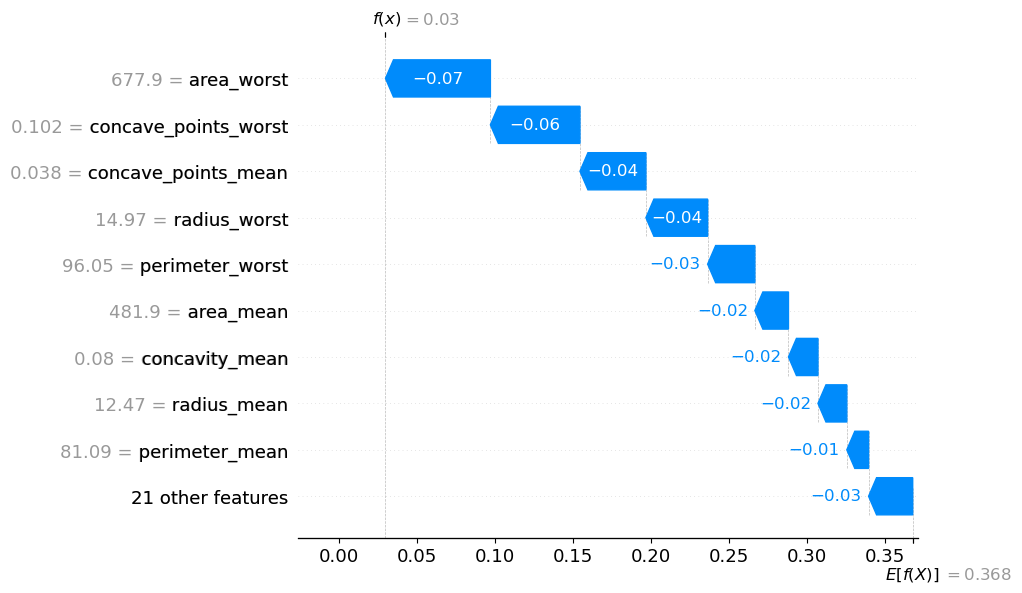

In [38]:
row_index = 0  
shap.plots.waterfall(shap.Explanation(values=single_output_shap_values[row_index],
                                      base_values=shap_values.base_values[row_index],
                                      data=X_test.iloc[row_index],feature_names=X_test.columns ))  

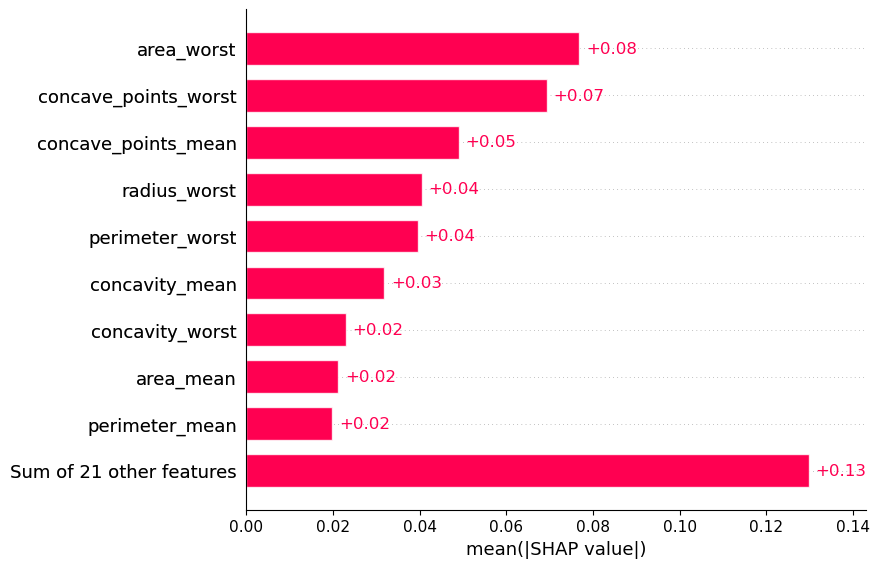

In [13]:
shap.plots.bar(single_output_shap_values)

## Summary
In this project, I learned how SHAP values help us understand the predictions of a machine learning model. I used a Random Forest classifier on the breast cancer dataset and applied SHAP to see which features influenced the model’s decisions the most.

SHAP explains each prediction by showing how much each feature pushed the result up or down compared to the average. For example, features like area_worst and concave_points_worst had the biggest impact on whether a tumor was classified as malignant or benign.

The visualizations helped me see both individual predictions (local explanation) and overall feature importance (global explanation). Overall, this was a helpful way to open the black box of the model and interpret its behavior more clearly.

